### 用全连接神经网络进行手写字符分类

标准的神经网络是一种有监督的学习算法，是一种非线性模型，它既可以用于分类问题，也可以用于回归问题，天然的支持多分类问题。

In [4]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets

手写数字数据集可用于多分类任务，有从0到9的手写数字，共10分类

dogits_data_shape  (1797, 64)


<Figure size 432x288 with 0 Axes>

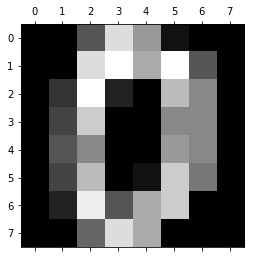

In [7]:
# 加载数据集
digits=datasets.load_digits()
print('dogits_data_shape ',digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()

#### MLP简单应用

In [17]:
# 交叉验证
from sklearn.model_selection  import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
X = digits.data
y = digits.target
cls = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
print('准确率： %s' % cross_val_score(cls, X, y, cv=5).mean()) 

准确率： 0.9221846456686684


#### 通过不同参数观看训练过程以及MLP在不同数据集上的表现

In [18]:
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]